In [1]:
from bs4 import BeautifulSoup 
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
url="https://quotes.toscrape.com/"
response=requests.get(url)
response

<Response [200]>

In [3]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}
 

In [4]:
for i in range(1,11):
    response=requests.get(f"https://quotes.toscrape.com/page/{i}/")
    with open(f"Web scraping/html/page{i}.html","w",encoding="utf-8") as f:
        f.write(response.text)
        print(f"page {i}downloaded")

page 1downloaded
page 2downloaded
page 3downloaded
page 4downloaded
page 5downloaded
page 6downloaded
page 7downloaded
page 8downloaded
page 9downloaded
page 10downloaded


In [5]:
items=[]
for i in range(1,11):
    with open(f"Web scraping/html/page{i}.html", encoding="utf-8") as f:
        content=f.read()
    soup=BeautifulSoup(content,"html.parser")
    articles=soup.select("div.quote")
    for article in articles:
        titles=article.select_one("span.text")
        author=article.select_one("small.author")
        title=titles.text
        authors=author.text
        items.append([title,authors])


In [6]:
df=pd.DataFrame(items, columns=["Quotes","Author"])

In [31]:
df.head(20)

,Quotes,Author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe
5,“Try not to become a man of success. Rather be...,Albert Einstein
6,“It is better to be hated for what you are tha...,André Gide
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin


In [8]:
df.to_csv("Quotes.csv",index=False)
import matplotlib.pyplot as plt

In [10]:
top_authors=df["Author"].value_counts().head(5)


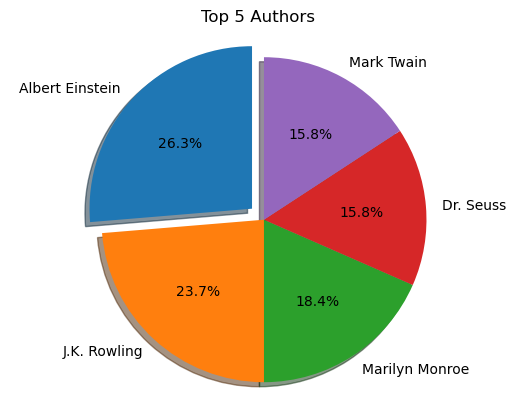

In [29]:
explode=[0.1,0,0,0,0]
plt.pie(top_authors,
        labels=top_authors.index,
        autopct="%1.1f%%",
       explode=explode,
       shadow=True,
       startangle=90)
plt.title("Top 5 Authors")
plt.axis("equal")
plt.show()